<a href="https://colab.research.google.com/github/AliefGr/Deep-Learning-1/blob/main/Optimasi_Pelatihan_Menggunakan_Callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimasi Pelatihan Menggunakan **Callbacks**

Pada latihan sebelumnya, pelatihan model berlangsung sebanyak jumlah epoch yang sudah ditentukan. Jika kita amati, epoch terakhir memperlihatkan nilai akurasi dari model tidak meningkat lagi. Contoh kasus lainnya, bayangkan kita menentukan epoch sebanyak 100 dan ternyata pada epoch ke-20, performa dari model sudah memenuhi target. Jika itu terjadi, tentunya kita harus menghentikan proses pelatihan agar tidak membuang-buang waktu, bukan?

Untungnya, kita dapat memberi tahu model untuk berhenti ketika telah mencapai metrik tertentu sehingga proses pelatihan model menjadi lebih singkat. Bayangkan ketika waktu untuk eksekusi 1 epoch sebesar 6 detik. Untuk mengeksekusi 100 epoch berarti membutuhkan waktu selama 600 detik. Jika model telah mencapai target akurasi yang kita inginkan misalnya pada epoch ke-30, dan model otomatis berhenti melakukan pelatihan, kita bisa menghemat waktu eksekusi 70 epoch yaitu selama 420 detik. Wow!

Kasus yang lebih ekstrem terjadi jika Anda membangun sebuah model neural network dengan banyak layer dengan waktu eksekusi 1 epochs sebesar 600 detik atau 10 menit tentunya Anda tidak ingin menunggu selama 60.000 detik atau setara dengan 1000 menit, ‘kan? Anda dapat menghemat cukup banyak waktu dengan hanya menggunakan callbacks. Tentu hal ini menjadi sebuah solusi yang sangat canggih, bukan?

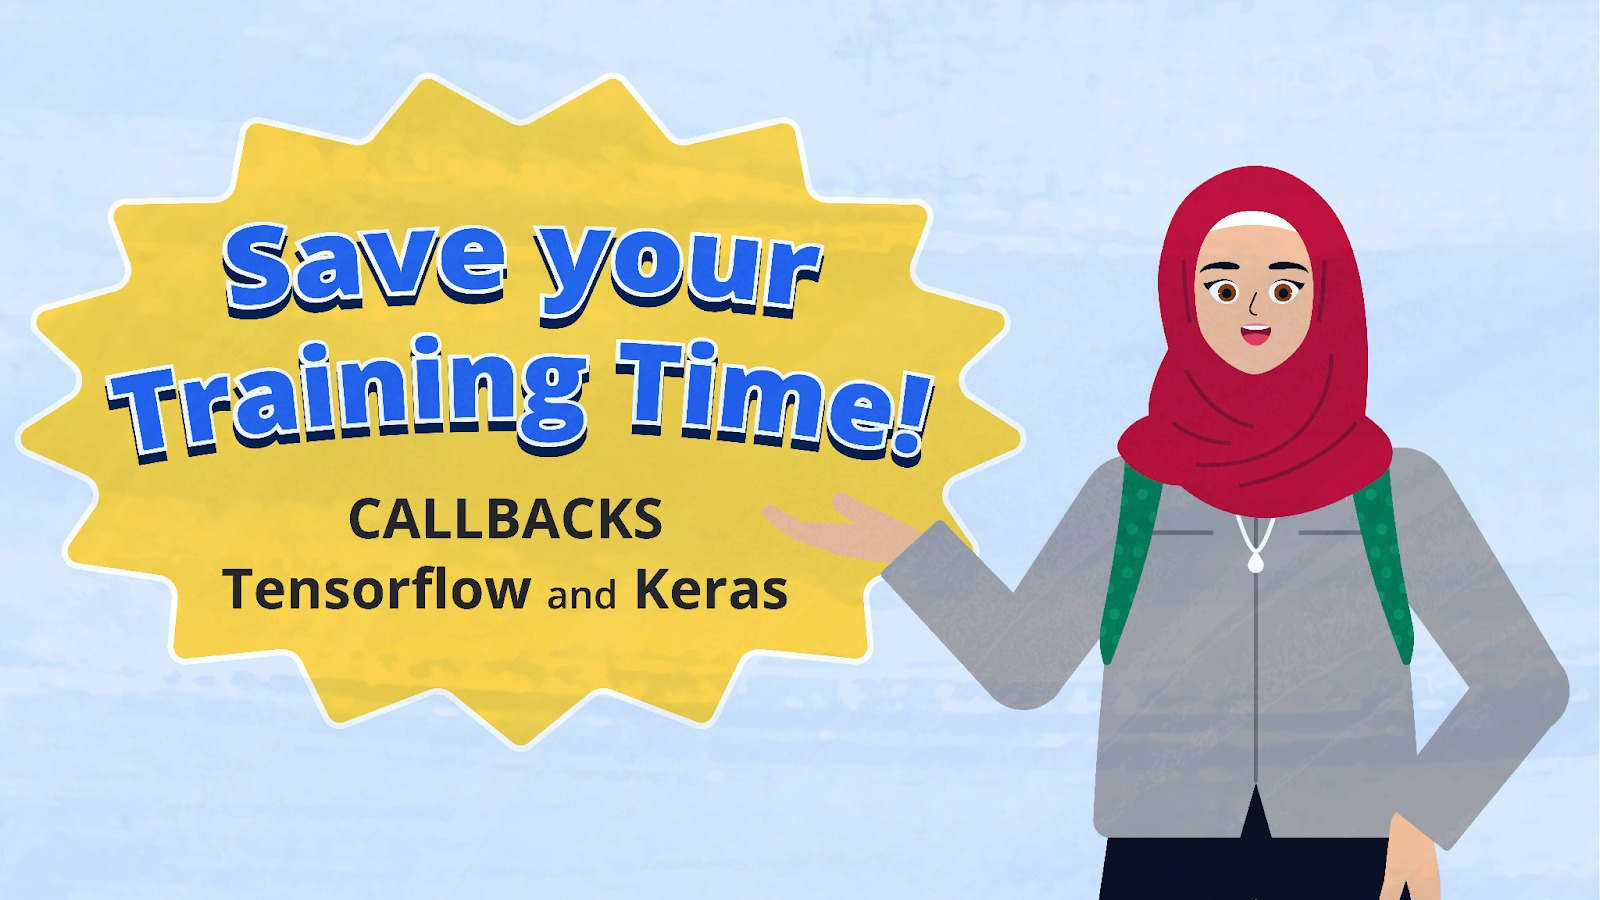dos-b39f403e8f4d9692520dff617d8f4a8220240623224504.jpeg

Fungsi callbacks membantu kita untuk memberi tahu model agar berhenti melakukan pelatihan ketika sudah mencapai target tertentu serta mencatat dan melakukan utilitas lain seperti menyimpan performa terbaik model. Nah, langsung saja kita praktik menggunakan callbacks. Kita masih menggunakan dataset dan model dari latihan klasifikasi iris pada materi sebelumnya. Kode utuhnya seperti di bawah ini.

In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1roJ83AbgzDcvRr0Gwud0BmdUQx-oSG-w')
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species, dtype=int)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]
# Normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dropout(0,5),
                    BatchNormalization(momentum=0.99),
                    Dense(3, activation='softmax')])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7031 - loss: 0.7146
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8730 - loss: 0.4976
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9331 - loss: 0.3733
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9455 - loss: 0.3179 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9532 - loss: 0.2673 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9754 - loss: 0.2431 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9723 - loss: 0.2341
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9299 - loss: 0.2462
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9563 - loss: 0.1867 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9514 - loss: 0.1768
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9782 - loss: 0.1648 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9577 - loss: 0.1535 


Setelah semuanya siap, kita perlu membuat sebuah kelas bernama myCallback(). Perhatikan baik-baik. Parameter pertama pada kelas callbacks di atas harus memiliki sifat inherit tf.keras.callbacks.Callback. Selanjutnya, kita buat fungsi yang paling penting yaitu on_epoch_end(). Fungsi inilah yang akan berperan untuk memberi tahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Kode if(logs.get(‘accuracy’)>0.9) sangat intuitif menunjukkan kalau kode itu memiliki arti “jika akurasi lebih besar dari 0.9, maka eksekusi perintah berikutnya”. Kita juga dapat menulis kode print(“\nAkurasi telah mencapai >90%!”) untuk ditampilkan ketika callbacks aktif.

Kode self.model.stop_training = True adalah kode yang memberi tahu model untuk menghentikan pelatihan. Setelah kelas ini dibuat, buatlah objek dari kelas tersebut. Berikut kode lengkap untuk membuat callbacks.

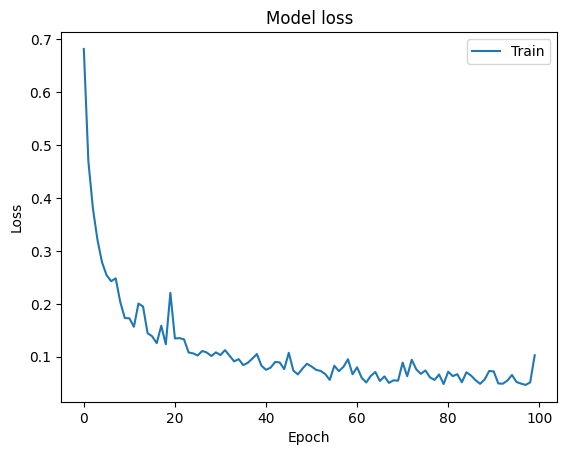

In [5]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

Setelah membuat sebuah objek callbacks, selanjutnya kita harus menambahkan hyperparameter tersebut pada saat melakukan proses pelatihan. Untuk menggunakan callbacks sangat gampang, kita hanya perlu menambahkan parameter callbacks dan mengisi objek callbacks yang telah kita buat pada parameter tersebut.

In [7]:
hist = model.fit(X_train, Y_train, epochs=100, callbacks = [callbacks])


Epoch 1/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9688 - loss: 0.0769
Akurasi telah mencapai >90%!
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9667 - loss: 0.0716 


Dari latihan di atas dapat dilihat model berhasil menghentikan pelatihan ketika telah mencapai akurasi yang kita tentukan pada epoch ke 5 dari 100. Kita telah menghemat waktu eksekusi sebanyak 96 epoch. Keren, bukan?

Dengan waktu pelatihan yang lebih cepat, tentunya Anda dapat melakukan eksplorasi jauh lebih banyak. Selain menggunakan callbacks, sebenarnya masih banyak fungsi yang sangat berguna ketika kita melakukan pelatihan, salah satu contoh lainnya adalah EarlyStopping.

Pada modul berikutnya, kita akan mempelajari secara saksama ragam callbacks yang powerful ini. Sampai pada saat kita dipertemukan kembali, Anda dapat membaca highlight materi tersebut pada tautan berikut ya: Callbacks pada TensorFlow. Sampai jumpa di materi berikutnya calon punggawa Indonesia emas!